In [2]:
from keras import Sequential
import keras
from keras.optimizers import SGD, Adam
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Lambda
from keras.regularizers import L2
import skimage
import numpy as np
from matplotlib import pyplot as plt
import imageio
import glob

In [10]:
label_names = ["Heart", "Oblong", "Oval", "Round", "Square"]

In [7]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    'face_shape_data/training_set',
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    validation_split=.15,
    subset="training",
    seed=42)

Found 18354 files belonging to 5 classes.
Using 15601 files for training.


In [6]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    "face_shape_data/training_set",
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    validation_split=0.15,
    subset="validation",
    shuffle=True,
    seed=42,
)

Found 18354 files belonging to 5 classes.
Using 2753 files for validation.


In [15]:
test_ds = keras.preprocessing.image_dataset_from_directory(
    'test/test',
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    seed=41)

Found 385 files belonging to 5 classes.


In [3]:
model = keras.saving.load_model("face_shape_models/face_shape_identifier.keras", safe_mode=False)

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, RandomZoom, RandomRotation

model = Sequential([
    Input(shape=(128, 128, 3)),
    Lambda(lambda x: x / 128 - 1),
    Conv2D(32, [3, 3], activation='relu'),
    MaxPooling2D([2, 2], 2),
    Dropout(0.3),
    Conv2D(64, [3, 3], activation='relu'),
    MaxPooling2D([2, 2], 2),
    Dropout(0.3),
    Conv2D(128, [3, 3], activation='relu'),
    MaxPooling2D([2, 2], 2),
    Dropout(0.3),
    Conv2D(256, [3, 3], activation='relu'),
    MaxPooling2D([2, 2], 2),
    Dropout(0.3),
    Conv2D(512, [3, 3], activation='relu'),
    MaxPooling2D([2, 2], 2),
    Dropout(0.3),
    Flatten(),
    Dense(5, activation="softmax")
])

In [114]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_12 (Lambda)              │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │        10,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,821 (6.02 MB)

 Trainable params: 1,578,821 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [128]:
adam_opt = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=adam_opt,metrics=['accuracy'])

In [129]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="model_chkpt.keras",
    save_best_only=True
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [158]:
hist = model.fit(train_ds, batch_size=25, epochs=100, verbose=True, validation_data=val_ds, callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
488/488 ━━━━━━━━━━━━━━━━━━━━ 71s 145ms/step - accuracy: 0.8231 - loss: 0.4851 - val_accuracy: 0.8903 - val_loss: 0.3572
Epoch 2/100
488/488 ━━━━━━━━━━━━━━━━━━━━ 69s 141ms/step - accuracy: 0.8250 - loss: 0.4852 - val_accuracy: 0.8925 - val_loss: 0.3591
Epoch 3/100
488/488 ━━━━━━━━━━━━━━━━━━━━ 64s 131ms/step - accuracy: 0.8352 - loss: 0.4613 - val_accuracy: 0.9201 - val_loss: 0.2901
Epoch 4/100
488/488 ━━━━━━━━━━━━━━━━━━━━ 63s 130ms/step - accuracy: 0.8356 - loss: 0.4547 - val_accuracy: 0.8994 - val_loss: 0.3227
Epoch 5/100
488/488 ━━━━━━━━━━━━━━━━━━━━ 69s 141ms/step - accuracy: 0.8420 - loss: 0.4321 - val_accuracy: 0.9114 - val_loss: 0.2803
Epoch 6/100
103/488 ━━━━━━━━━━━━━━━━━━━━ 50s 132ms/step - accuracy: 0.8550 - loss: 0.4086

KeyboardInterrupt: 

In [17]:
loss, accuracy = model.evaluate(test_ds)
print("acc: ", accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7565 - loss: 0.6928
acc:  0.768831193447113


In [164]:
model.save('saved_models/face_shape_identifier.keras')

In [18]:
mapping = {"0": "heart", "1": "oblong", "2": "oval", "3": "round", "4": "square"}

Found 5 files belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


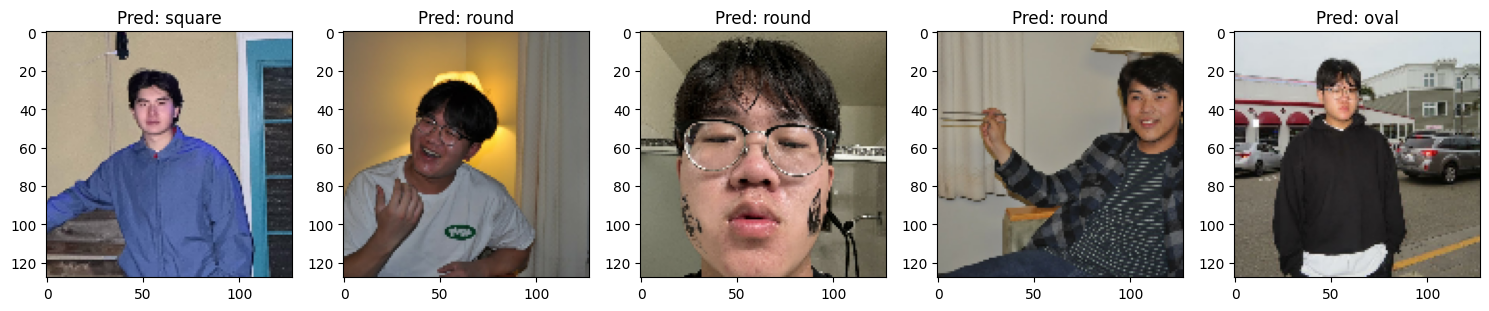

In [34]:
import matplotlib.pyplot as plt
import numpy as np

manual_ds = keras.preprocessing.image_dataset_from_directory(
    'manual/',
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    seed=40)



for images, labels in manual_ds.take(1): 
    fig, axes = plt.subplots(1, images.shape[0], figsize=(15, 5))
    for i in range(images.shape[0]):
        image = images[i].numpy().astype('uint8')
        label = labels[i].numpy()
        
        predicted_label = np.argmax(model.predict(np.expand_dims(image, axis=0)), axis=1)[0]
        
        ax = axes[i]
        ax.imshow(image)
        ax.set_title(f"Pred: {mapping[str(predicted_label)]}")
        face_shape = mapping[str(predicted_label)]
    plt.tight_layout()
    plt.show()


In [35]:
from typing import Literal


def get_optimal_hairstyle(
    gender: Literal["male", "female"],
    face_shape: Literal["oval", "heart", "oblong", "round", "square"],
):
    if gender == "male":
        if face_shape == "oval":
            return {
                "recommendations": [
                    "buzz",
                    "textured quiff",
                    "pompadour",
                    "man bun",
                    "comb over",
                ],
                "explanation": """
                            Oval faces tend to be symmetric and balanced, so most hairstyles
                            will look good on oval faces. It's best to pick hairstyles that draw attention
                            to your features and keep the hair off of your face. Avoid hairstyles that
                            cover your forehead, as it will make you face look rounder.
                            """,
            }
        elif face_shape == "round":
            return {
                "recommendations": ["slick back", "skin fades", "spiky hair"],
                "explanation": """
                                Round faces are best fitted with hairstyles that are short on the sides but add height
                                or volume, to create the illusion that the face is longer.
                               """,
            }
        elif face_shape == "oblong":
            return {
                "recommendations": ["side part", "brush up", "short spiky hair"],
                "explanation": """
                                Oblong faces are long, so you should try shorter haircuts to avoid making
                                your face look even longer. 
                               """,
            }
        elif face_shape == "heart":
            return {
                "recommendations": [
                    "textured crop",
                    "side swept bangs",
                    "pompadour",
                    "crew cut",
                    "ivy league",
                ],
                "explanation": """
                                Heart-shaped faces tend to have a wider forehead and a narrower chin, so hairstyles
                                that add volume around the chin or soften the forehead are ideal. Side-swept styles
                                or longer hair on the sides can help balance the proportions of the face, while
                                textured or voluminous styles on top can draw attention away from the forehead.
                               """,
            }
        elif face_shape == "square":
            return {
                "recommendations": [
                    "textured quiff",
                    "side part",
                    "ivy league",
                    "fade",
                    "comb over",
                ],
                "explanation": """
                                Square faces are angular, so softening the sharp lines with styles that add height
                                and texture is a good idea. Styles that are longer on top with short sides or 
                                fades work well to balance the strong jawline. Avoid heavy bangs or blunt cuts 
                                that emphasize the square shape.
                               """,
            }

    if gender == "female":
        if face_shape == "oval":
            return {
                "recommendations": [
                    "long waves",
                    "bob cut",
                    "pixie cut",
                    "soft curls",
                    "side-swept bangs",
                ],
                "explanation": """
                            Oval faces are well-balanced, so most hairstyles work. However, styles that highlight
                            the features, such as soft curls or waves, will enhance the natural symmetry. Bobs
                            and pixie cuts are great for accentuating facial structure. Side-swept bangs can add 
                            a bit of volume and texture without overwhelming the face.
                            """,
            }
        elif face_shape == "round":
            return {
                "recommendations": [
                    "long layers",
                    "side part",
                    "angular bob",
                    "textured waves",
                ],
                "explanation": """
                                Round faces are best suited for hairstyles that add height and volume on top, 
                                creating the illusion of a longer face. Long layers or waves add dimension and texture, 
                                while side parts and angular bobs can add sharpness to the face and draw attention 
                                away from the width.
                               """,
            }
        elif face_shape == "oblong":
            return {
                "recommendations": [
                    "soft waves",
                    "layered bob",
                    "shaggy bob",
                    "side-swept bangs",
                ],
                "explanation": """
                                For oblong faces, it's best to avoid too much length. Hairstyles that add volume 
                                around the cheeks, like soft waves or layered bobs, work best. Side-swept bangs 
                                can help balance the long shape of the face and create a softer silhouette.
                               """,
            }
        elif face_shape == "heart":
            return {
                "recommendations": [
                    "long layers with volume",
                    "bob with soft waves",
                    "side-swept bangs",
                    "pixie cut with volume",
                    "asymmetrical lob",
                ],
                "explanation": """
                                Heart-shaped faces can benefit from hairstyles that balance the broader forehead 
                                and narrow chin. Long layers with volume around the jawline help to soften sharp 
                                features. A bob with soft waves or a pixie cut with added volume creates harmony 
                                in the face's proportions. Side-swept bangs or asymmetrical lobs can also help 
                                minimize the width of the forehead.
                               """,
            }
        elif face_shape == "square":
            return {
                "recommendations": [
                    "soft curls",
                    "layered lob",
                    "textured waves",
                    "asymmetrical bob",
                    "side-swept bangs",
                ],
                "explanation": """
                                Square faces benefit from softening the angular features. Soft curls or waves 
                                work well to create texture and volume, which helps round out the jawline. 
                                Layered lobs or asymmetrical bobs also help soften the square face. Side-swept 
                                bangs add movement and balance the strong features.
                               """,
            }

In [36]:

gender = input("Select gender: Male or Female")
if gender.lower() not in ["male", "female"]:
    raise ValueError("Please select from male and female.")

get_optimal_hairstyle(gender, face_shape)

{'recommendations': ['buzz',
  'textured quiff',
  'pompadour',
  'man bun',
  'comb over'],
 'explanation': "\n                            Oval faces tend to be symmetric and balanced, so most hairstyles\n                            will look good on oval faces. It's best to pick hairstyles that draw attention\n                            to your features and keep the hair off of your face. Avoid hairstyles that\n                            cover your forehead, as it will make you face look rounder.\n                            "}